<a href="https://colab.research.google.com/github/vivekmehendiratta/Time-Series-Analysis-Intro/blob/master/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

# Loading Data

In [64]:
train = pd.read_csv('Dataset/Train.csv')
test = pd.read_csv('Dataset/Test.csv')

train.shape, test.shape

((18288, 3), (5112, 2))

In [65]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

# Hypothesis Generation

    - Traffic will increase as the years pass by
    - Traffic will be high from May to October (Tourist)
    - Traffic on weekdays will be more
    - Traffic during peak hours will be high

# Feature Extraction

In [66]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')

In [67]:
train_original = train.copy()
test_original = test.copy()

train_original.columns, test_original.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [68]:
for i in (train, test, test_original, train_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [69]:
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [70]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek ==6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

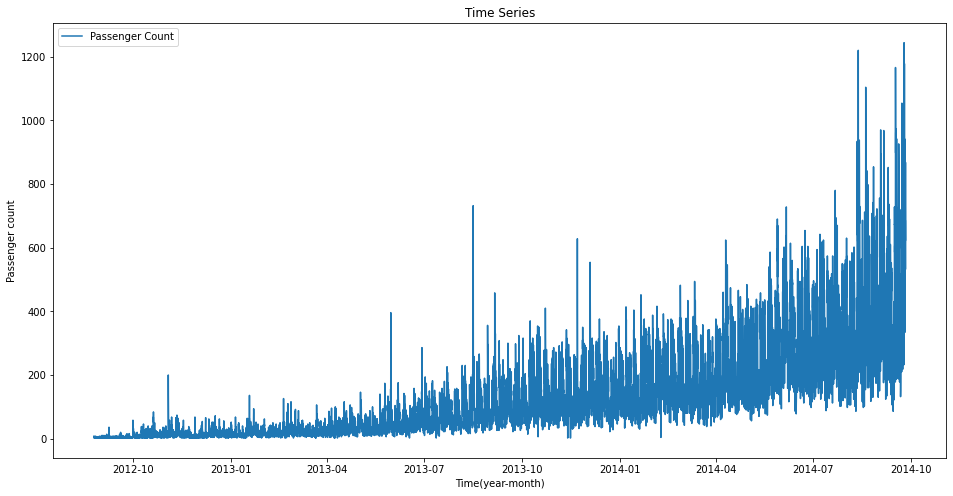

In [71]:
train.index = train['Datetime']
df = train.drop('ID', 1)
ts = df['Count']

plt.figure(figsize=(16, 8))
plt.plot(ts, label = 'Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger count')
plt.legend(loc = 'best')
plt.show()

# Exploratory Analysis

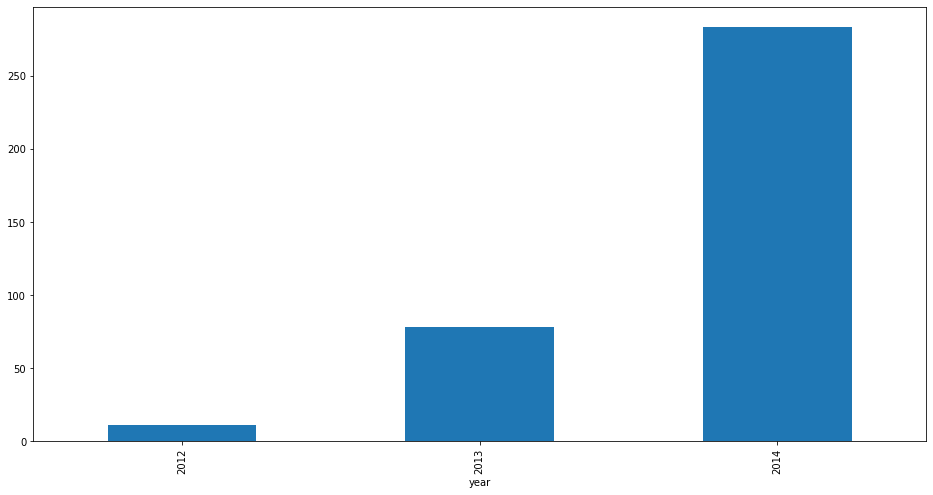

In [72]:
# Hypothesis 1 : Traffic will increase as the year pass by

plt.figure(figsize=(16, 8))
train.groupby('year')['Count'].mean().plot.bar()
plt.show()

**There is an exponential growth in terms of traffic as the year pass by**
This validates our 1st hypothesis

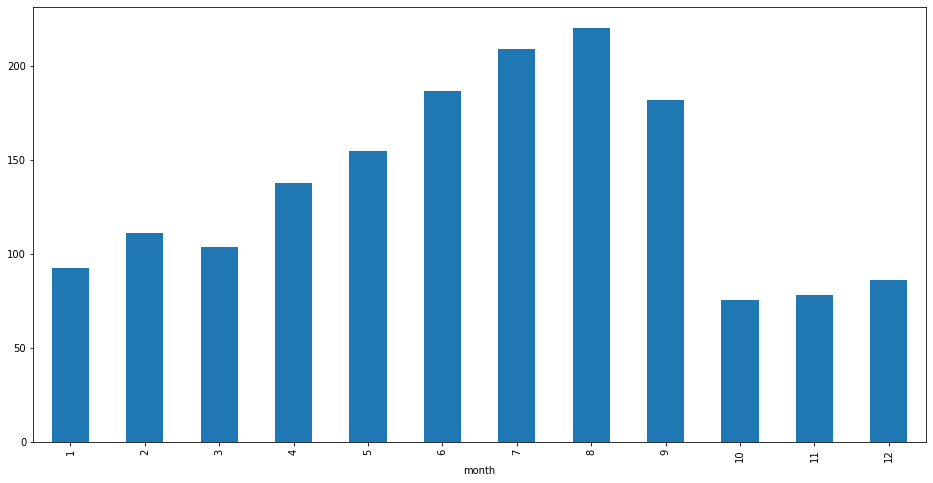

In [73]:
# Hypothesis 2 : Traffic will be more from May to October

plt.figure(figsize=(16, 8))
train.groupby('month')['Count'].mean().plot.bar()
plt.show()

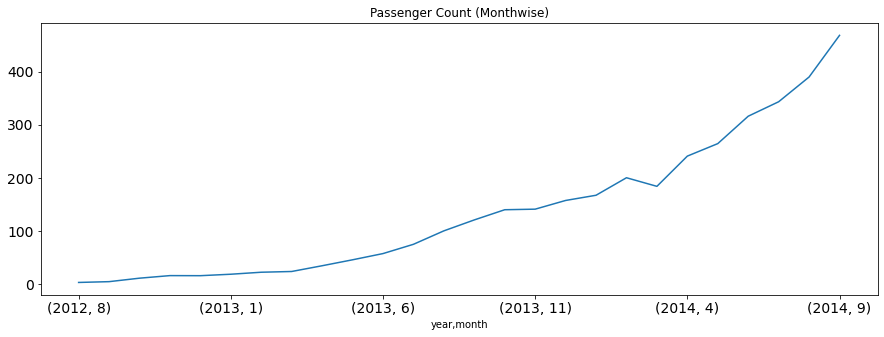

In [74]:
plt.figure(figsize=(16, 8))
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize = (15,5), title = 'Passenger Count (Monthwise)', fontsize = 14)
plt.show()

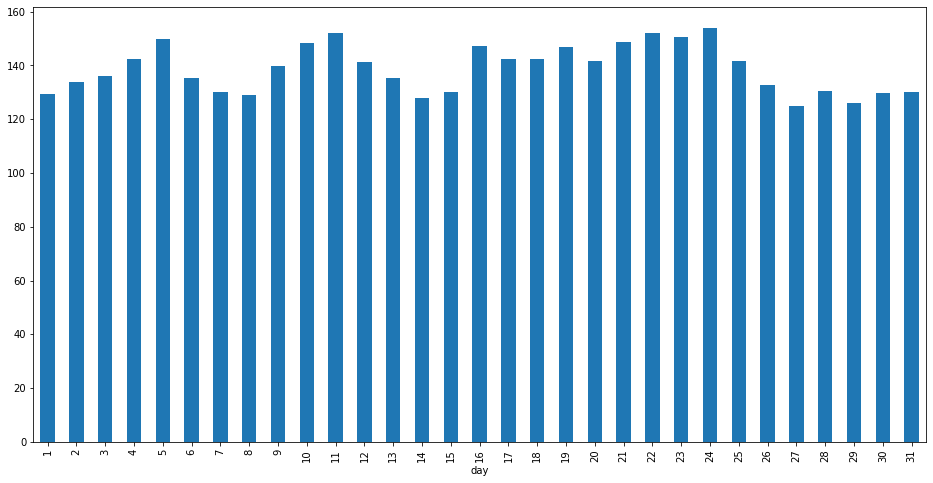

In [75]:
# Hypothesis 3 : Traffic on weekdays will be more

plt.figure(figsize=(16, 8))
train.groupby('day')['Count'].mean().plot.bar()
plt.show()

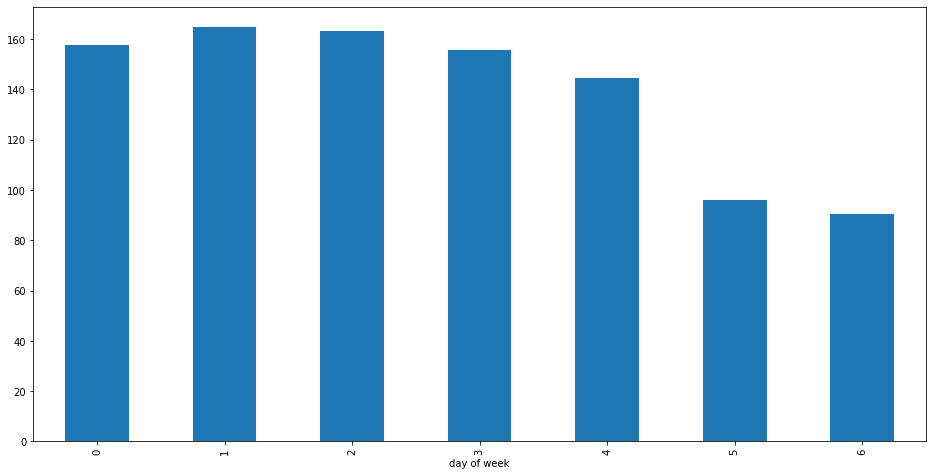

In [76]:
plt.figure(figsize=(16, 8))
train.groupby('day of week')['Count'].mean().plot.bar()
plt.show()

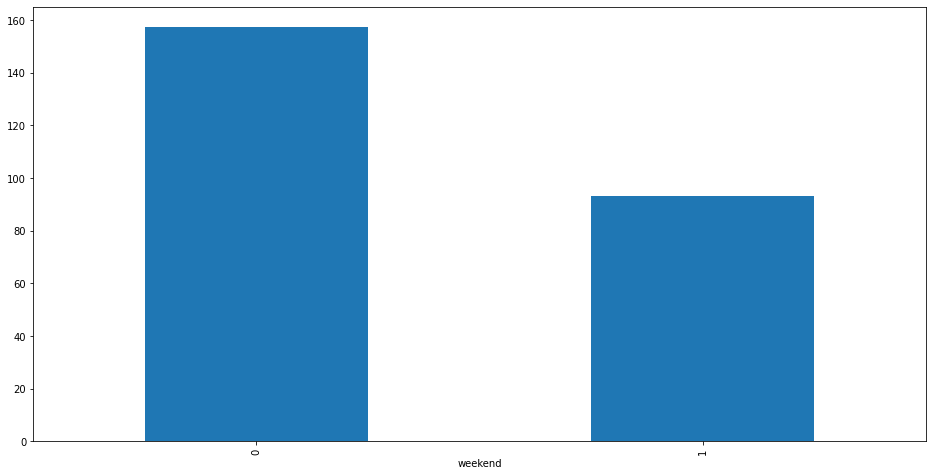

In [77]:
plt.figure(figsize=(16, 8))
train.groupby('weekend')['Count'].mean().plot.bar()
plt.show()

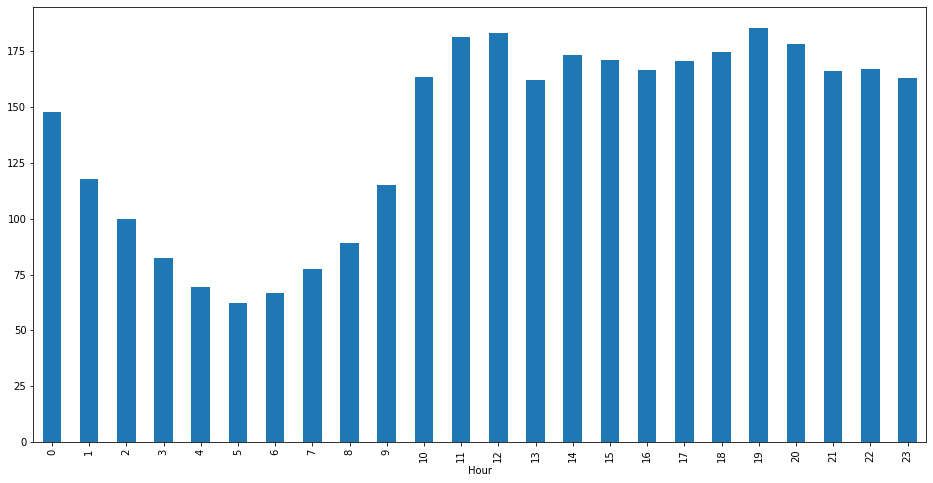

In [78]:
# Hypothesis 4 : Traffic in peak hours will be more

plt.figure(figsize=(16, 8))
train.groupby('Hour')['Count'].mean().plot.bar()
plt.show()

In [79]:
train = train.drop('ID', 1)

In [80]:
# aggregating the hourly timeseries to daily, weekly, monthly time series

train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Daily time series
daily = train.resample('D').mean()

# Weekly time series
weekly = train.resample('W').mean()

# Monthly time series
monthly = train.resample('M').mean()

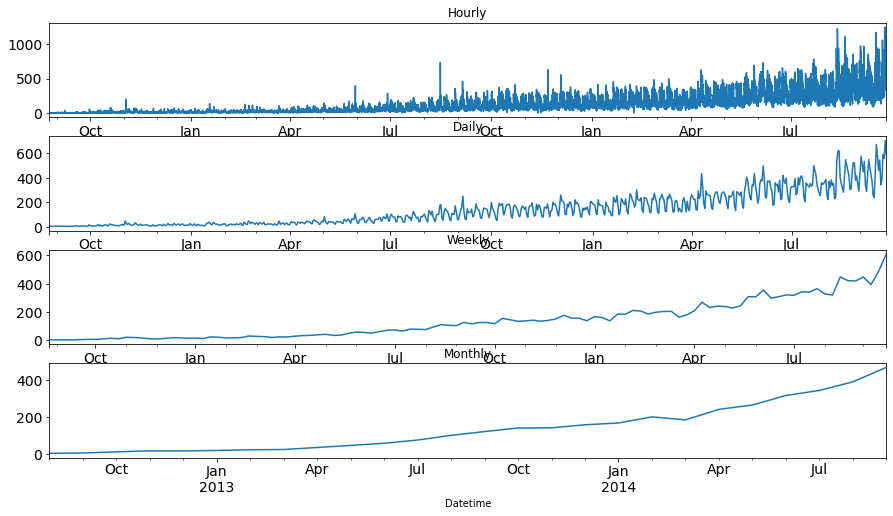

In [81]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize = (15,8), title = 'Hourly', fontsize = 14, ax = axs[0])
daily.Count.plot(figsize = (15,8), title = 'Daily', fontsize = 14, ax = axs[1])
weekly.Count.plot(figsize = (15,8), title = 'Weekly', fontsize = 14, ax = axs[2])
monthly.Count.plot(figsize = (15,8), title = 'Monthly', fontsize = 14, ax = axs[3])
plt.show()

In [82]:
test.Timestamp = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
test.index = test.Timestamp

# COnverting to daily mean
test_daily = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.index = train.Timestamp

# COnverting to daily mean
train_daily = train.resample('D').mean()

# Splitting 'train' data into training and validation set

In [83]:
Train = train_daily['2012-08-25':'2014-06-24']
valid = train_daily['2014-06-25':'2014-09-25']

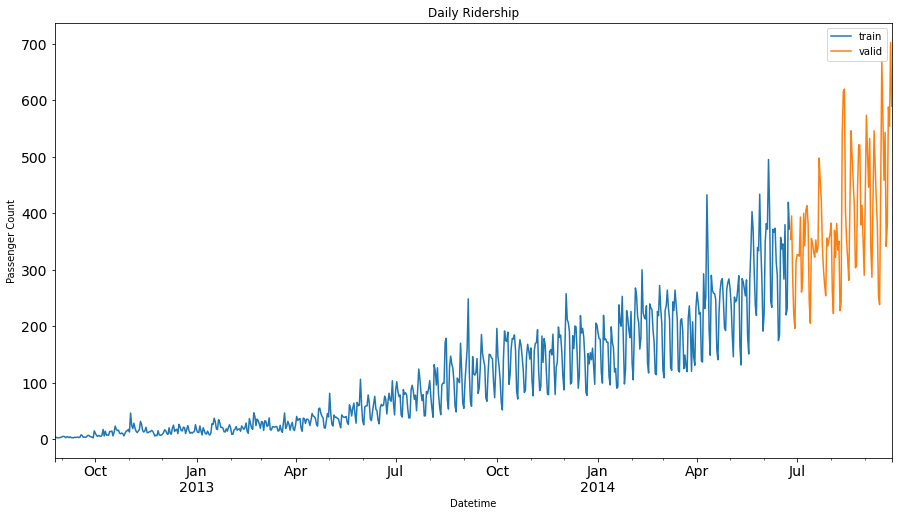

In [84]:
Train.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'train')
valid.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')
plt.show()

# Modeling Techniques

## Naive Approach

In this forecasting technique, we assume that the next expected point is equal to the last observed point.

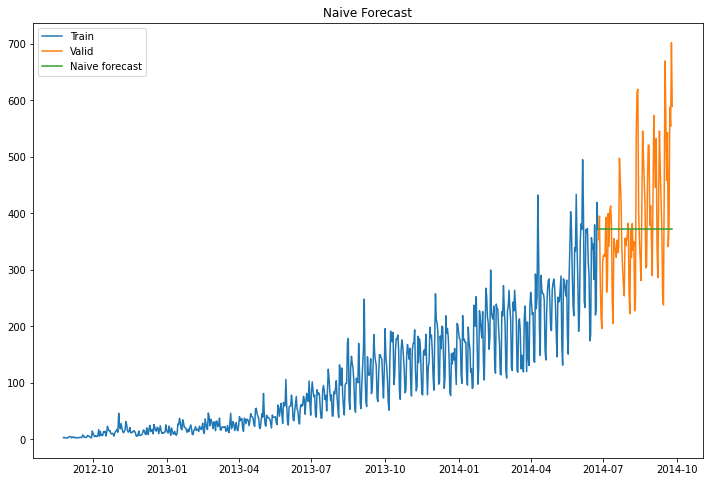

In [85]:
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd) - 1]

plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Count'], label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'Valid')
plt.plot(y_hat.index, y_hat['naive'], label = 'Naive forecast')
plt.legend(loc = 'best')
plt.title('Naive Forecast')
plt.show()

In [86]:
# rmse = standard deviation of the residuals
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


## Moving Average

In this technique, average of last few passenger counts is taken as expected value

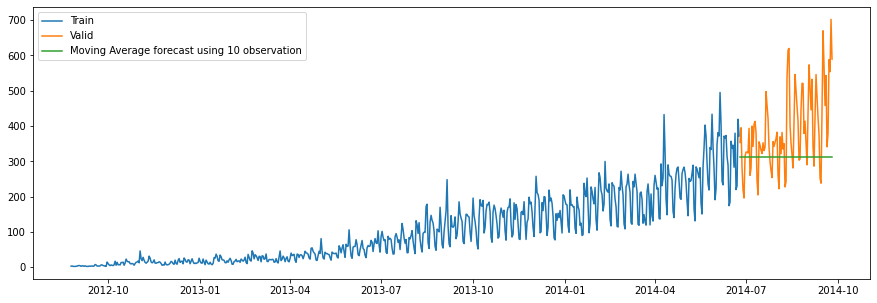

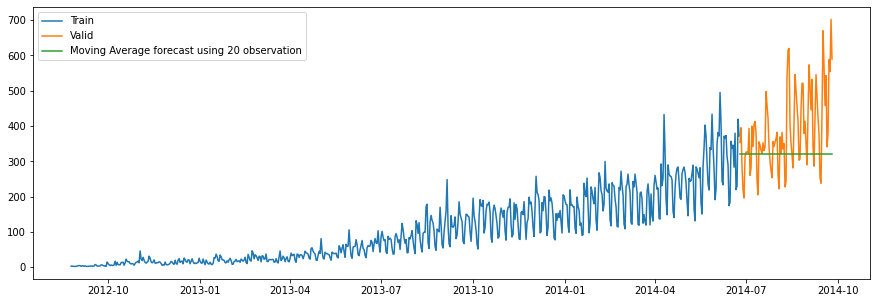

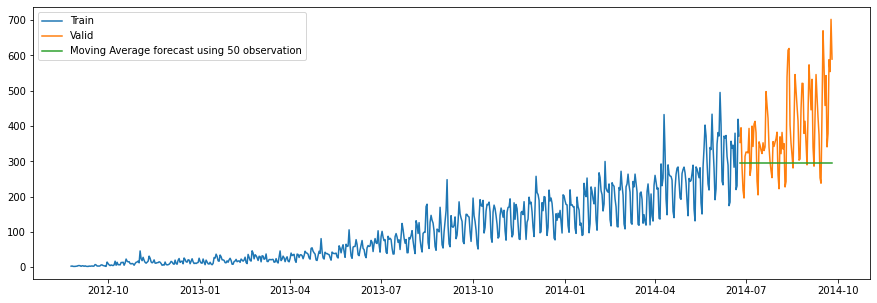

In [87]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]

plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label = 'Moving Average forecast using 10 observation')
plt.legend(loc = 'best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]

plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label = 'Moving Average forecast using 20 observation')
plt.legend(loc = 'best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]

plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label = 'Moving Average forecast using 50 observation')
plt.legend(loc = 'best')
plt.show()

In [88]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)

144.19175679986802


## Simple Exponential Smoothing

    - In this technique, larger weights are assigned to more recent observations than to abservations from the distant past
    - The weights decay exponentially as we go from recent to past observations.

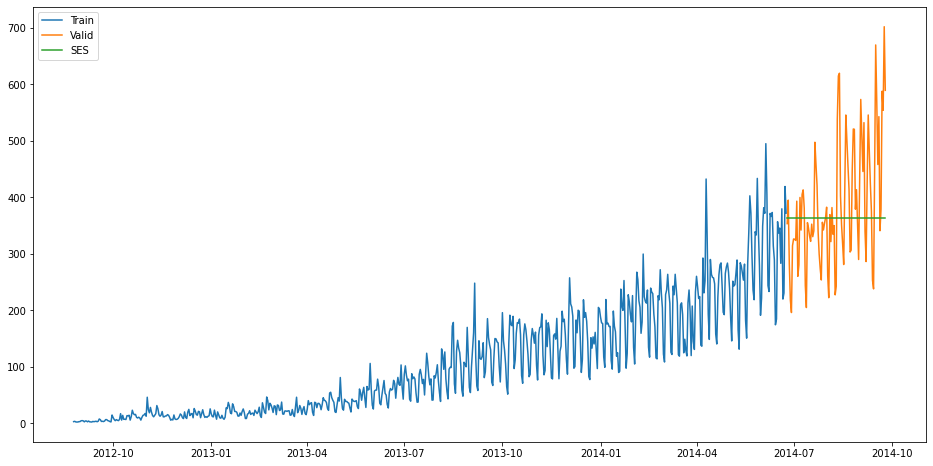

In [89]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.array(Train['Count'])).fit(smoothing_level = 0.6, optimized = False)

y_hat_avg['SES'] = fit2.forecast(len(valid))

plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['SES'], label = 'SES')
plt.legend(loc = 'best')
plt.show()

In [90]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

113.43708111884514


## Holt's Linear Trend Model

  - This technique takes into the account of trend of the dataset.

The time series is decomposed into 4 parts:
  - Observed : Original Time Series.
  - Trend : increasing or decreasing behaviour of the time series.
  - Seasonal : seasonality of time series.
  - Residual : obtained by removing any trend or seasonality in the time series.


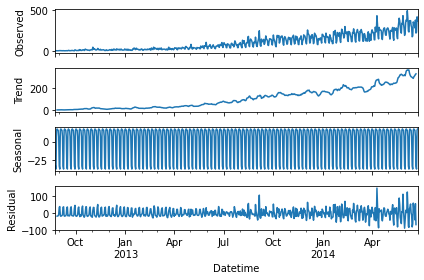

In [91]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

In [92]:
result

(-4.456560536856819,
 0.00023540466467665785,
 45,
 18242,
 {'1%': -3.430708525404171,
  '10%': -2.5668543412994906,
  '5%': -2.861698454786869},
 181026.8337109476)

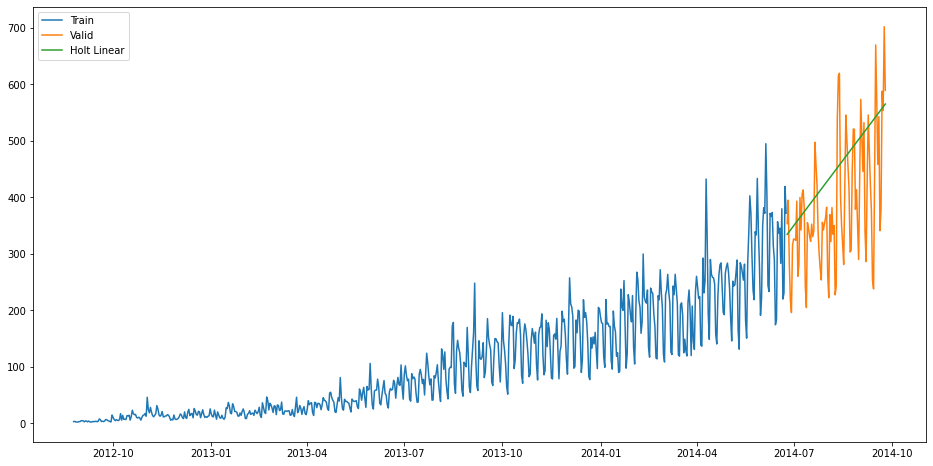

In [93]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')
plt.show()

In [94]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


# Forecasting using Holt's Linear Trend Model

In [95]:
submission = pd.read_csv('Dataset/sample_submission.csv')

In [96]:
predict = fit1.forecast(len(test_daily))

In [97]:
test_daily['prediction'] = predict

In [98]:
test_daily

,ID,year,month,day,Hour,prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745
...,...,...,...,...,...,...
2015-04-22,23291.5,2015.0,4.0,22.0,11.5,856.365605
2015-04-23,23315.5,2015.0,4.0,23.0,11.5,858.873849
2015-04-24,23339.5,2015.0,4.0,24.0,11.5,861.382094


In [99]:
# Calculating the hourly ratio of count
train_original['ratio'] = train_original['Count'] / train_original['Count'].sum()

In [100]:
# Grouping the hourly ratio
temp = train_original.groupby('Hour')['ratio'].sum()

In [101]:
# Groupby to csv format
pd.DataFrame(temp, columns = ['Hour', 'ratio']).to_csv('Groupby.csv')

In [102]:
temp2 = pd.read_csv('Groupby.csv')
temp2 = temp2.drop('Hour.1', 1)

In [103]:
# Merge test and test_original on day, month, and year
merge = pd.merge(test_daily, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis = 1)

# Predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on = 'Hour', how = 'left')

# COnverting the ratio to the original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24
prediction['ID'] = prediction['ID_y']

submission = prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'Hour', 'ratio'], axis = 1)
pd.DataFrame(submission, columns = ['ID', 'Count']).to_csv('Holt linear.csv')

In [104]:
submission

,Count,ID
0,355.692974,18288
1,283.861602,18289
2,240.234347,18290
3,198.497058,18291
4,167.075574,18292
...,...,...
5107,1156.675482,23395
5108,1111.525192,23396
5109,1037.491153,23397
5110,1041.255041,23398


# Holt's Winter model on daily time series analysis

  - Takes trend and seasonality into the account for time series modeling

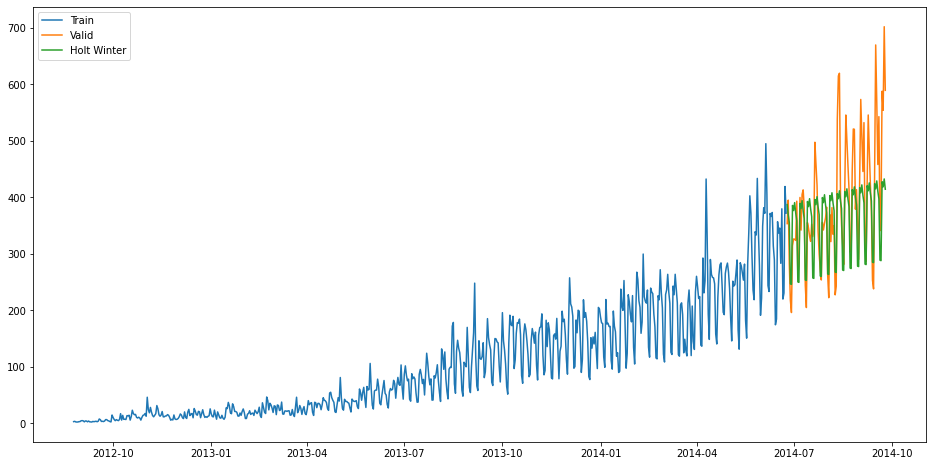

In [105]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods=7, trend = 'add', seasonal = 'add').fit()
y_hat_avg['Holt Winter'] = fit1.forecast(len(valid))

plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['Holt Winter'], label = 'Holt Winter')
plt.legend(loc = 'best')
plt.show()

In [106]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg['Holt Winter']))
print(rms)

82.37571191747172


In [107]:
predict = fit1.forecast(len(test_daily))
test_daily['prediction'] = predict

# Merge test and test_original on day, month, and year
merge = pd.merge(test_daily, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis = 1)

# Predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on = 'Hour', how = 'left')

# COnverting the ratio to the original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24
prediction['ID'] = prediction['ID_y']

submission = prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'Hour', 'ratio'], axis = 1)
pd.DataFrame(submission, columns = ['ID', 'Count']).to_csv('Holt linear.csv')

# ARIMA model

- Works with stationary series

**Stationary Check**
- Dickey Fuller test to check the stationarity of the series
- Null Hypothesis : time series is not stationarity
- Alternate hypothesis : time series is stationary
- test statistics < critical value : Reject null hypothesis

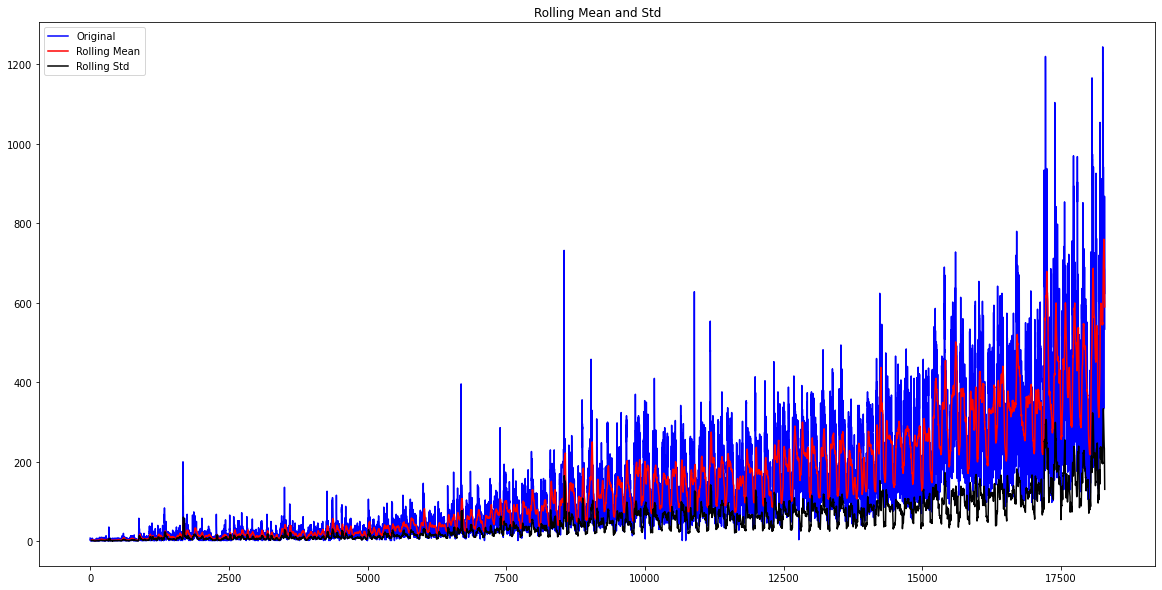

results of dickey fuller test:
Test Statistics                   -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of observations used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [108]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  # Determinig rolling statistics
  rolmean = timeseries.rolling(24).mean()
  rolstd = timeseries.rolling(24).std()

  # Plot rolling statistics
  orig = plt.plot(timeseries, color = 'blue', label = 'Original')
  mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
  std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')

  plt.legend(loc = 'best')
  plt.title('Rolling Mean and Std')
  plt.show(block = False)

  # Perform Dickey fuller test
  print('results of dickey fuller test:')
  dftest = adfuller(timeseries, autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#Lags Used', 'Number of observations used'])

  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

test_stationarity(train_original['Count'])

In [109]:
# removing trend

Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

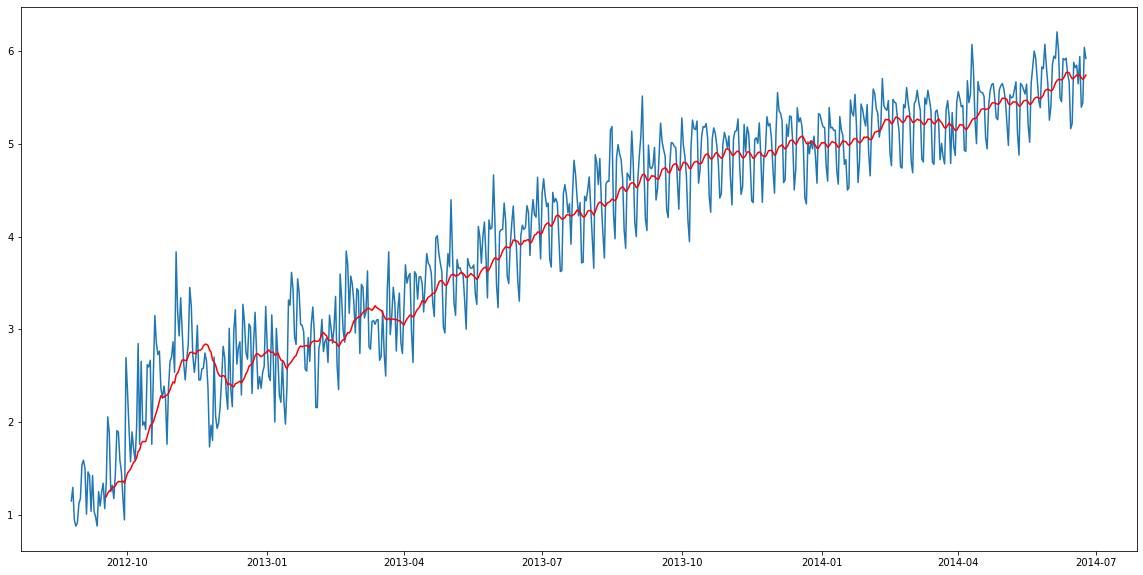

In [110]:
moving_avg = Train_log.rolling(24).mean()

plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

In [111]:
train_log_moving_avg_diff = Train_log - moving_avg

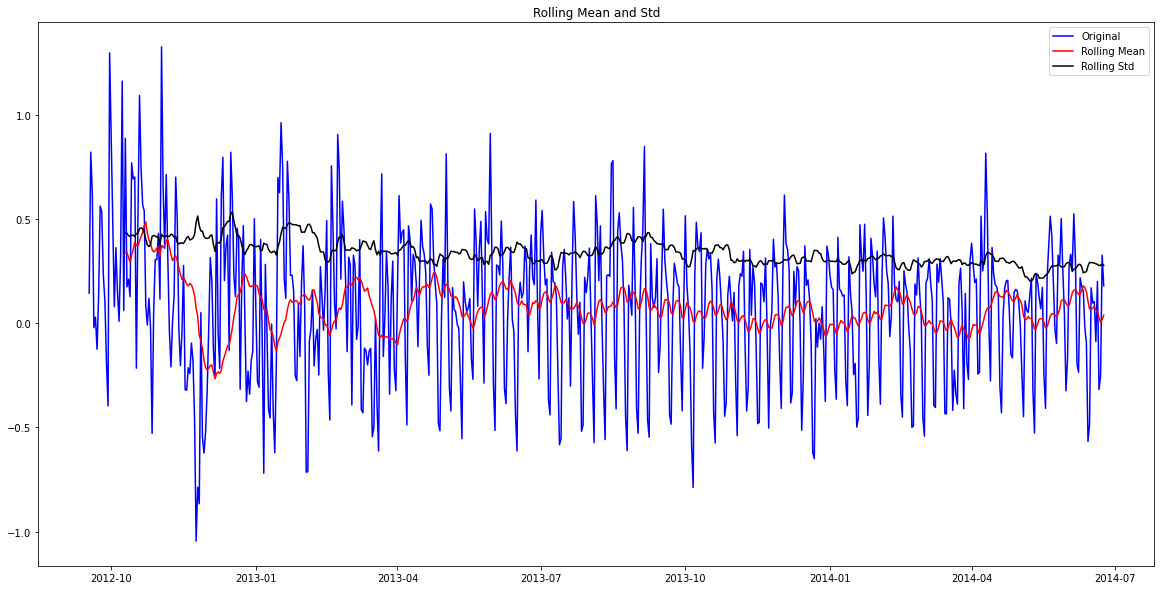

results of dickey fuller test:
Test Statistics               -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of observations used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [112]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

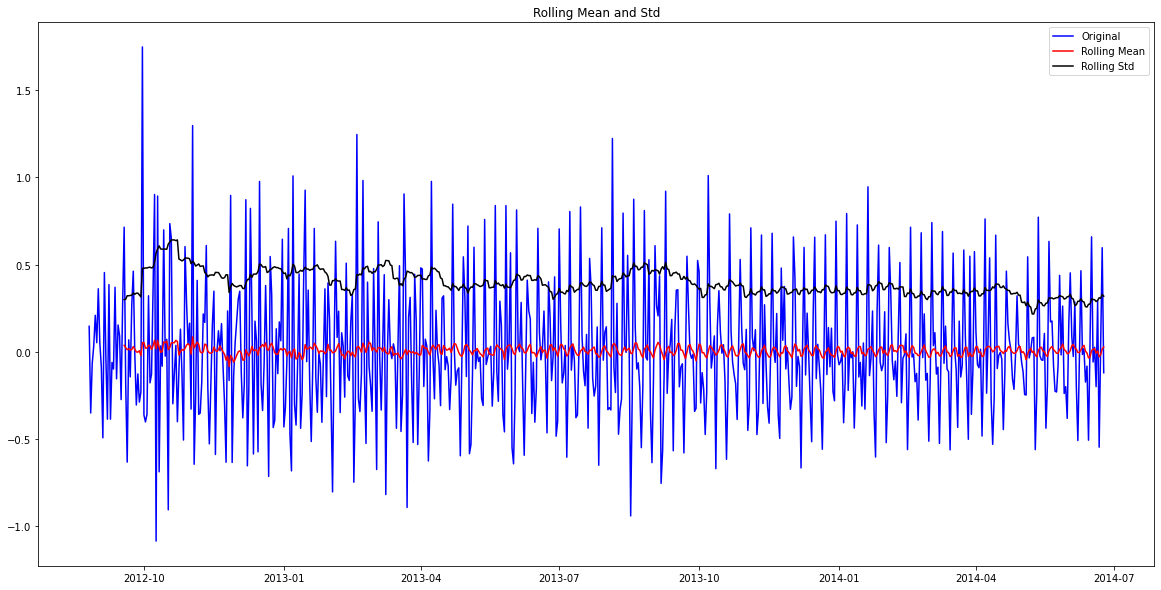

results of dickey fuller test:
Test Statistics               -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of observations used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [113]:
# Stabilize the mean of the time series
# Differencing can help to make the series stable

train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

In [114]:
# Removing Seasonality

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)

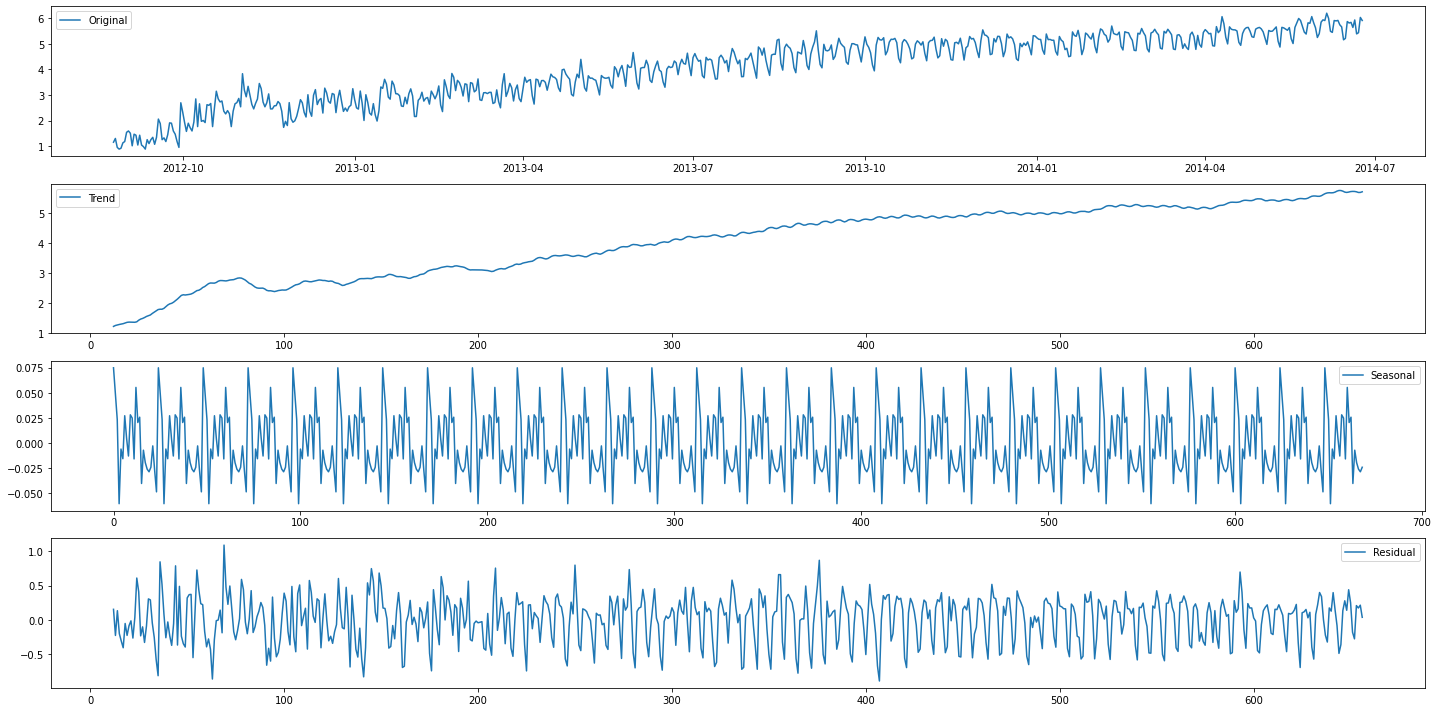

In [115]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(Train_log, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()

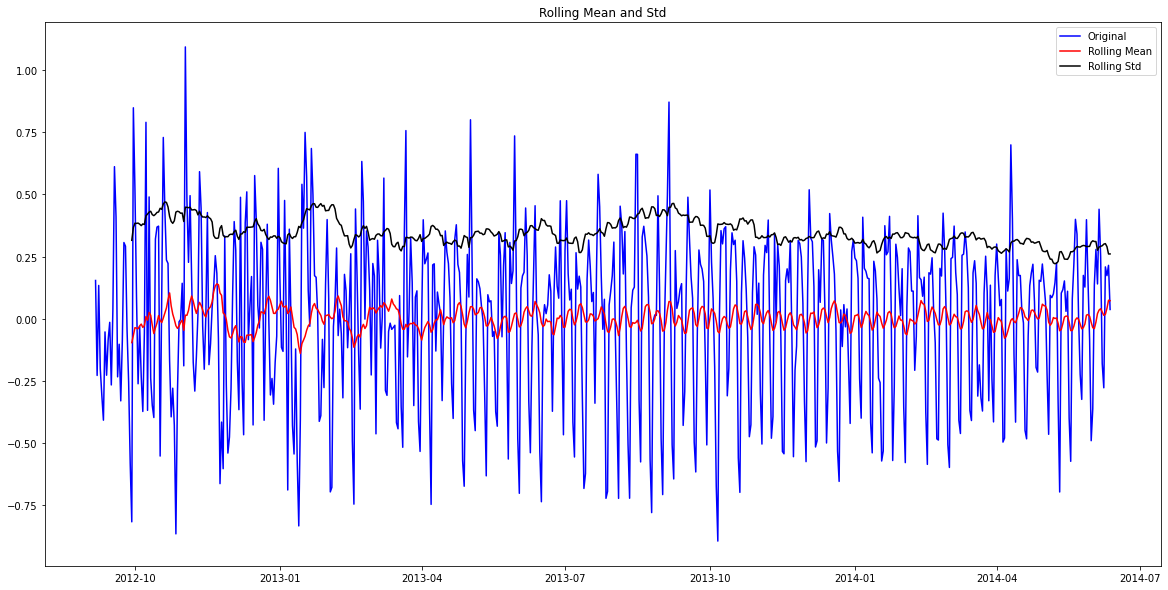

results of dickey fuller test:
Test Statistics               -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of observations used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [116]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationarity(train_log_decompose[0])

## Forecasting using ARIMA

- p,d,q parameter
- ACF and PACF 
- ACF :  Autocorrelation Function, correlation b/w timeseries and lagged version of itself
- PACF : Partial AutoCorrelation Function, correlation b/w timeseries with a lagged version of itself but after eliminating the variations explained by intervening comparisons


In [117]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf  = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf  = pacf(train_log_diff.dropna(), nlags = 25, method = 'ols')

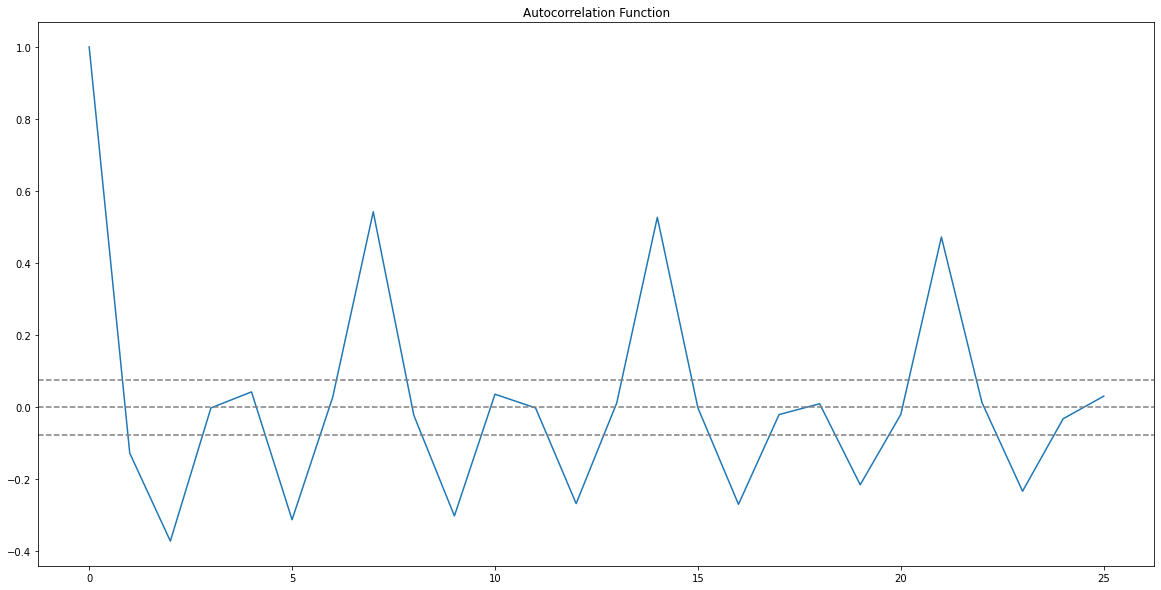

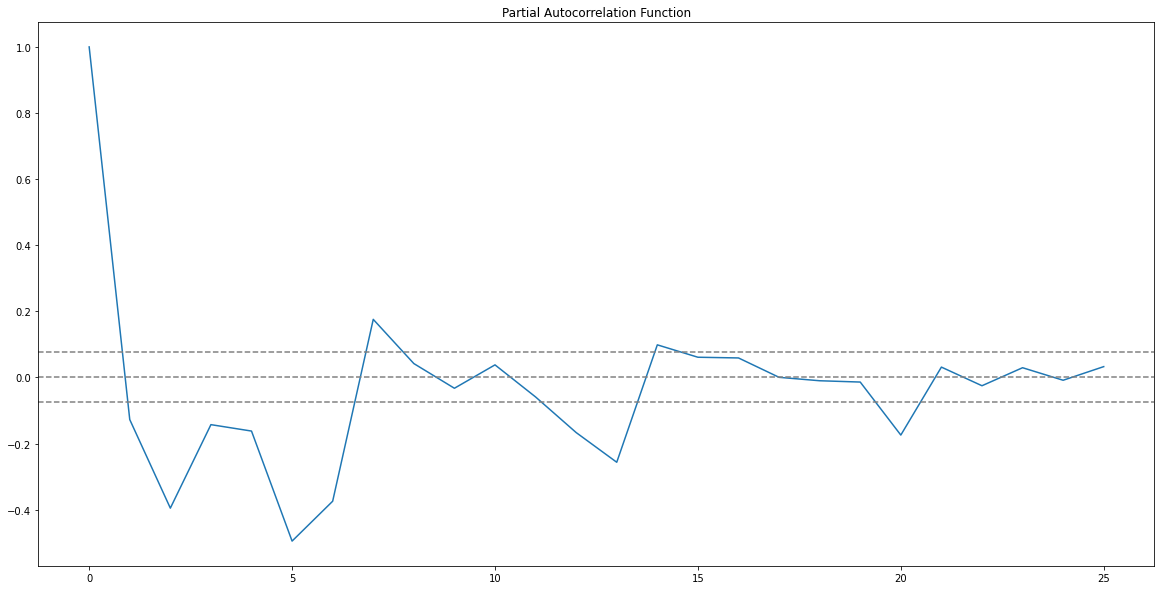

In [118]:
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

- p : The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.
- q : The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

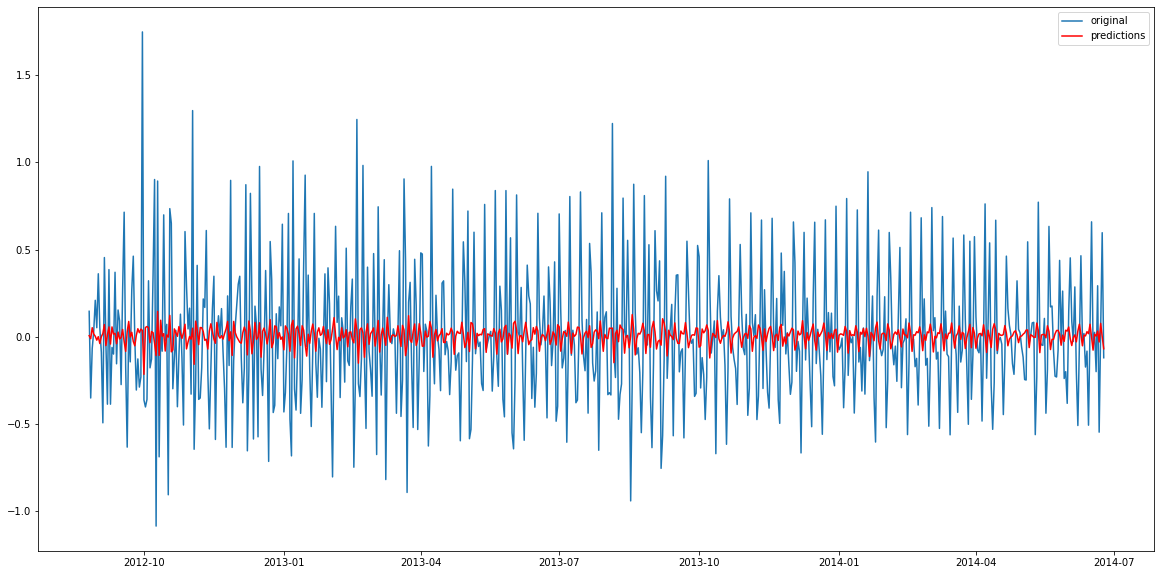

In [119]:
# AR Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order = (1,1,0))
results_AR = model.fit(disp = -1)

plt.plot(train_log_diff.dropna(), label = 'original')
plt.plot(results_AR.fittedvalues, color = 'red', label = 'predictions')
plt.legend(loc = 'best')
plt.show()

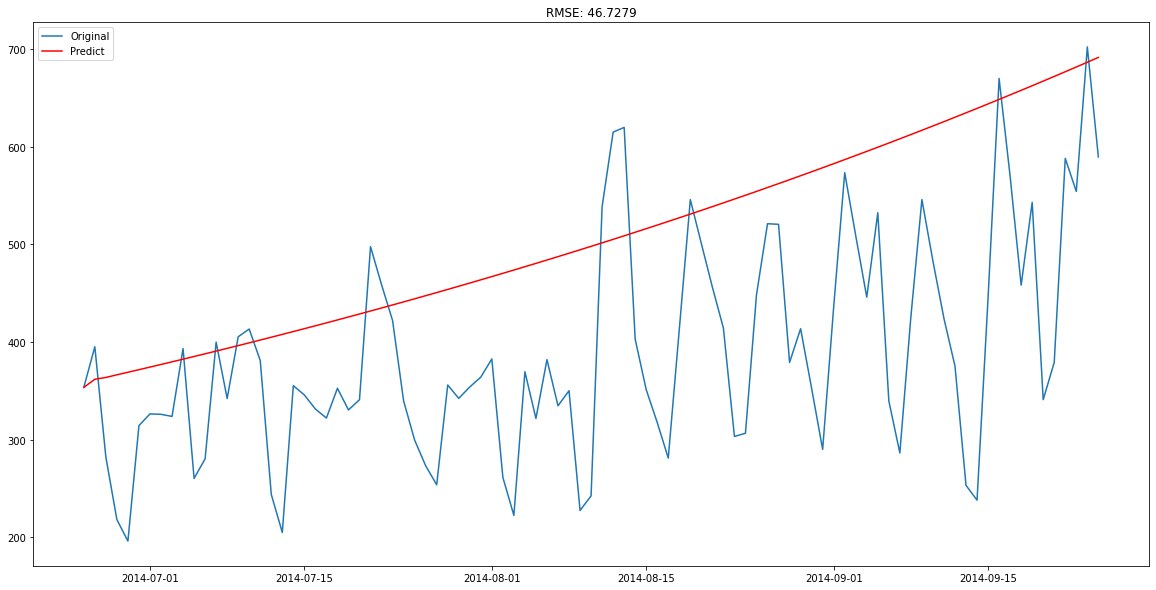

In [120]:
AR_predict = results_AR.predict(start = '2014-06-25', end = '2014-09-25')
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
AR_predict1 = AR_predict1.add(AR_predict, fill_value=0)
AR_predict = np.exp(AR_predict1)

plt.plot(valid['Count'], label='Original')
plt.plot(AR_predict, color = 'red', label='Predict')
plt.legend(loc = 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count'])) / valid.shape[0]))
plt.show()

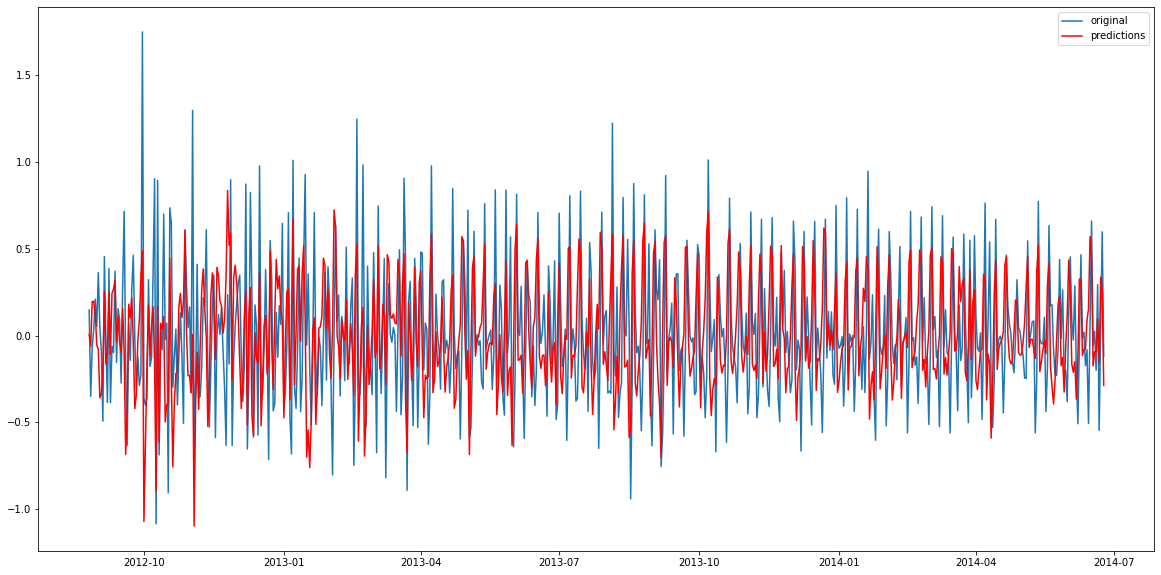

In [121]:
# MA Model
model = ARIMA(Train_log, order = (0,1,1))
results_MA = model.fit(disp = -1)

plt.plot(train_log_diff.dropna(), label = 'original')
plt.plot(results_MA.fittedvalues, color = 'red', label = 'predictions')
plt.legend(loc = 'best')
plt.show()

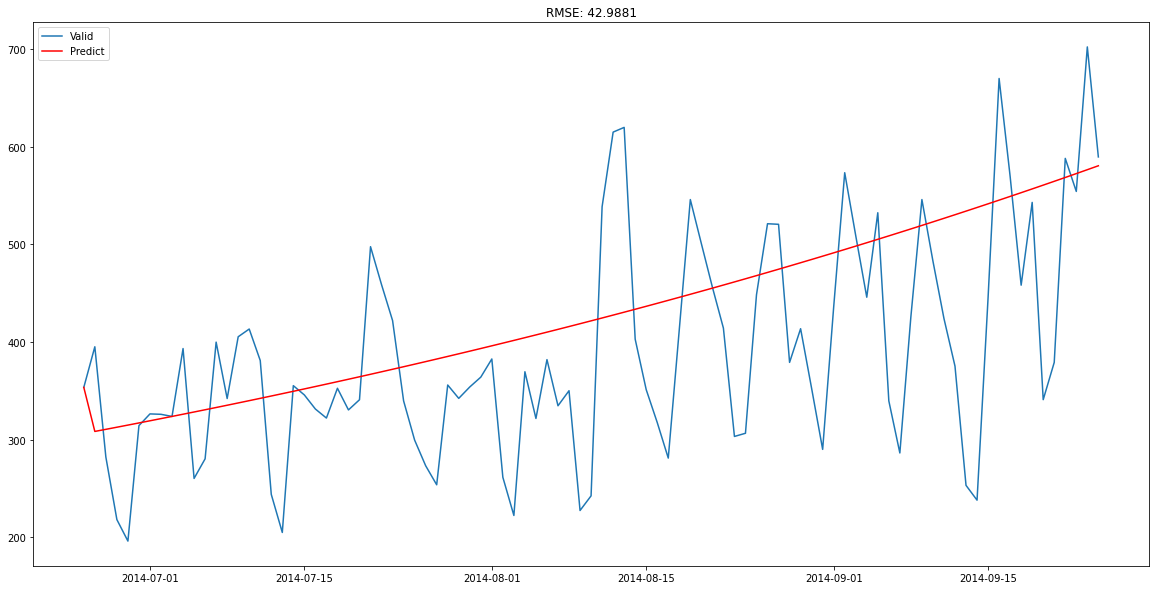

In [122]:
MA_predict = results_MA.predict(start = '2014-06-25', end = '2014-09-25')
MA_predict = MA_predict.cumsum().shift().fillna(0)
MA_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
MA_predict1 = MA_predict1.add(MA_predict, fill_value=0)
MA_predict = np.exp(MA_predict1)

plt.plot(valid['Count'], label='Valid')
plt.plot(MA_predict, color = 'red', label='Predict')
plt.legend(loc = 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count'])) / valid.shape[0]))
plt.show()

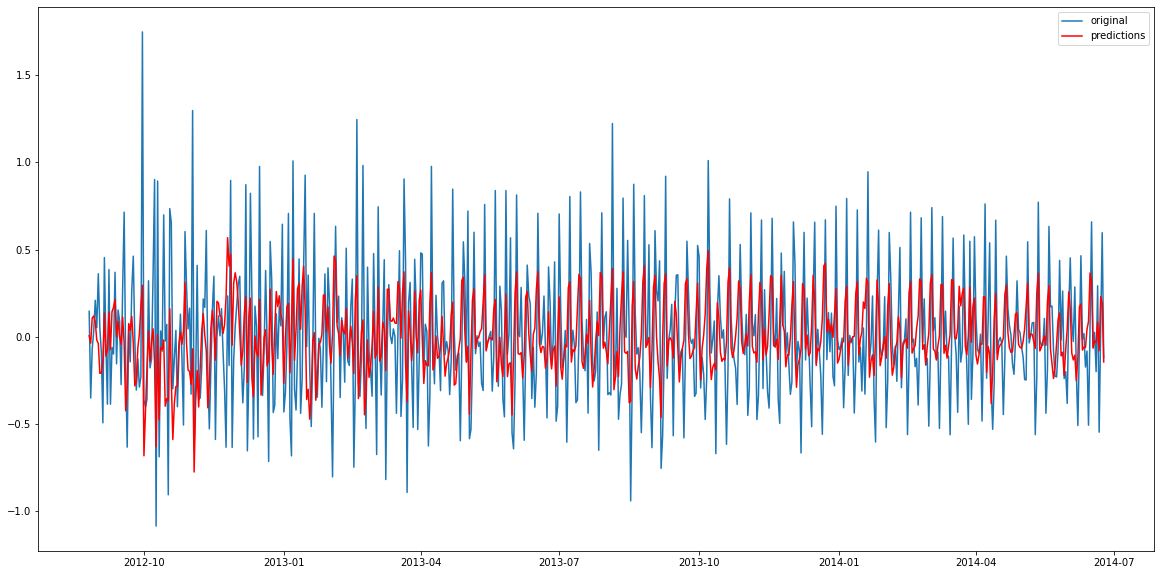

In [123]:
# Combine Model

model = ARIMA(Train_log, order = (1,1,1))
results_ARIMA = model.fit(disp = -1)

plt.plot(train_log_diff.dropna(), label = 'original')
plt.plot(results_ARIMA.fittedvalues, color = 'red', label = 'predictions')
plt.legend(loc = 'best')
plt.show()

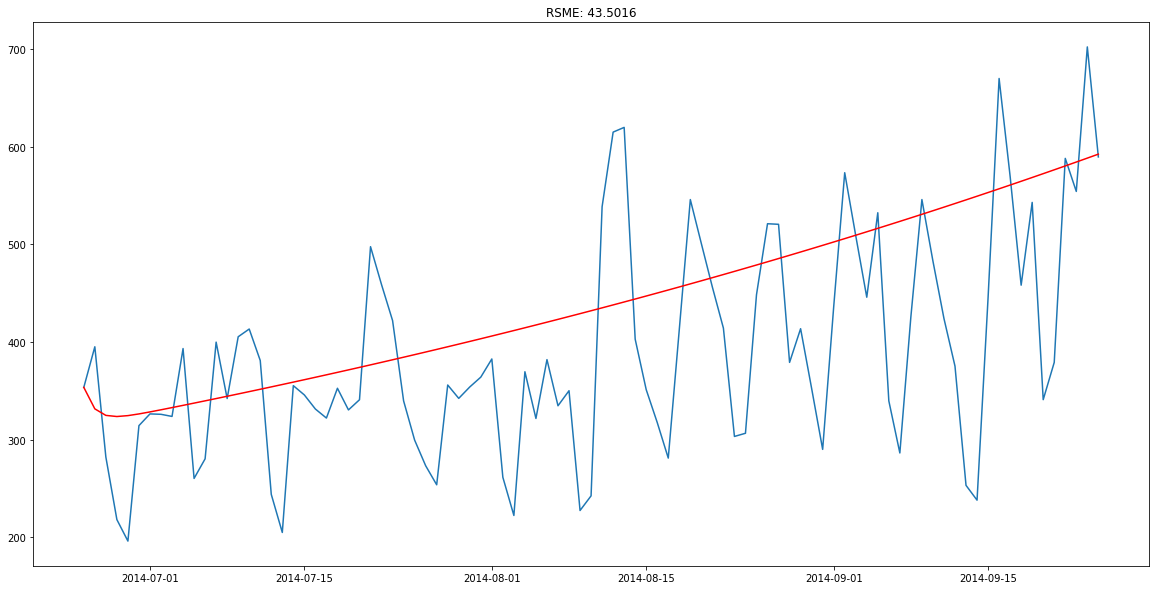

In [124]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff = predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    
    #log transformation for predicted values
    predict_log = predict_base.add(predict_diff, fill_value = 0)
    predict = np.exp(predict_log)

    #plot the curve
    plt.plot(given_set['Count'], label = 'Given set')
    plt.plot(predict, color = 'red', label = 'Predict')
    plt.plot(loc = 'best')
    plt.title('RSME: %.4f' %(np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()


#scale back the predictions to the original scale
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    #plot the curve
    plt.plot(given_set['Count'], label = 'Given set')
    plt.plot(predict, color = 'red', label = 'Predict')
    plt.plot(loc = 'best')
    plt.title('RSME: %.4f' %(np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

    return predict

ARIMA_predict_diff = results_ARIMA.predict(start = '2014-06-25', end = '2014-09-25')
check_prediction_diff(ARIMA_predict_diff, valid)

#SARIMAX model on daily time series

- SARIMAX model takes into seasonality of the time series.

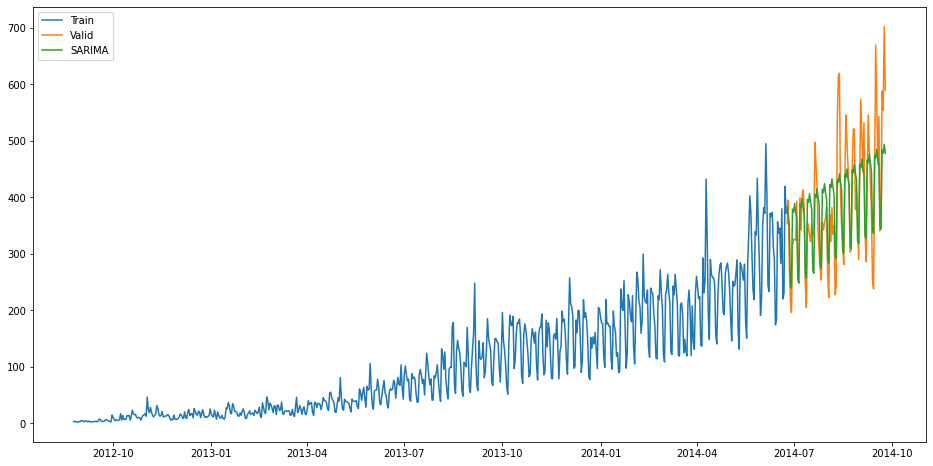

In [133]:
import statsmodels.api as sm

y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order = (1,1,1), seasonal_order = (0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start = '2014-06-25', end = '2014-09-25', dynamic = True)

plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['SARIMA'], label = 'SARIMA')
plt.legend(loc = 'best')
plt.show()


In [134]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

68.32526787258014


In [135]:
predict = fit1.predict(start = '2014-09-26', end = '2015-04-26', dynamic = True)
test_daily['prediction'] = predict

# Merge test and test_original on day, month, and year
merge = pd.merge(test_daily, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis = 1)

# Predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on = 'Hour', how = 'left')

# COnverting the ratio to the original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24
prediction['ID'] = prediction['ID_y']

submission = prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'Hour', 'ratio'], axis = 1)
pd.DataFrame(submission, columns = ['ID', 'Count']).to_csv('SARIMAX.csv')